In [59]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')


In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = 150

In [61]:
# Useful Functions
def plot_bar_graph(cat_var):
    sns.barplot(x=cat_var, y='cnt', data=df)
    plt.xticks(rotation=45,ha="right")
    plt.show()

def plot_box(cat_var):
    sns.boxplot(x = cat_var, y = 'cnt', data = df)
    #plt.xticks(rotation=45,ha="right")
    #plt.show()    

In [62]:
# read the data
df = pd.read_csv("day.csv")

### Understanding The Data

#### Getting the glimpse of the data

In [63]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


##### Checking some aspects of the dataframe

In [64]:
df.shape

(730, 16)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [66]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Cleaning The Dataset

#### Comment on instant column
This column just provides the index of respective row and hence does not add any value to our analysis. So I will be dropping it

#### Comment on dteday column

"dteday" column is date column. Generally I would use this column to derive information like, month, day, year, weekday, weekend, etc information. But all the information is readily avaialble in the original dataset in various columns. So this makes the column "dteday" redundant for our analysis. Hence I would drop this column.


#### Comment on temp and atemp
Both these columns basically provide temperature information on a given day. "temp" indicates temperature forecasted by the department whereas "atemp" indicates the actual feeling temperature on the same day. Since both of there will always be related to each other and provide similar information we can get rid of one out of these two. According to me, "atemp" is more related to our analysis as this is the temperature felt by cyclists. Hence I am keeping "atemp" and dropping "temp"

#### Comment on casual and registered
First of all, these two columns sum up to give us final count which is indicated by column "cnt" which is also our target variable. We are not doing any categorization in our analysis and we are more interested in getting a model that provides variables which affect our target variable. Hence considering these columns will not give us any insights. Hence I will be dropping both these columns from my analysis.

In [67]:
df = df.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)

In [68]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Visualising The Data

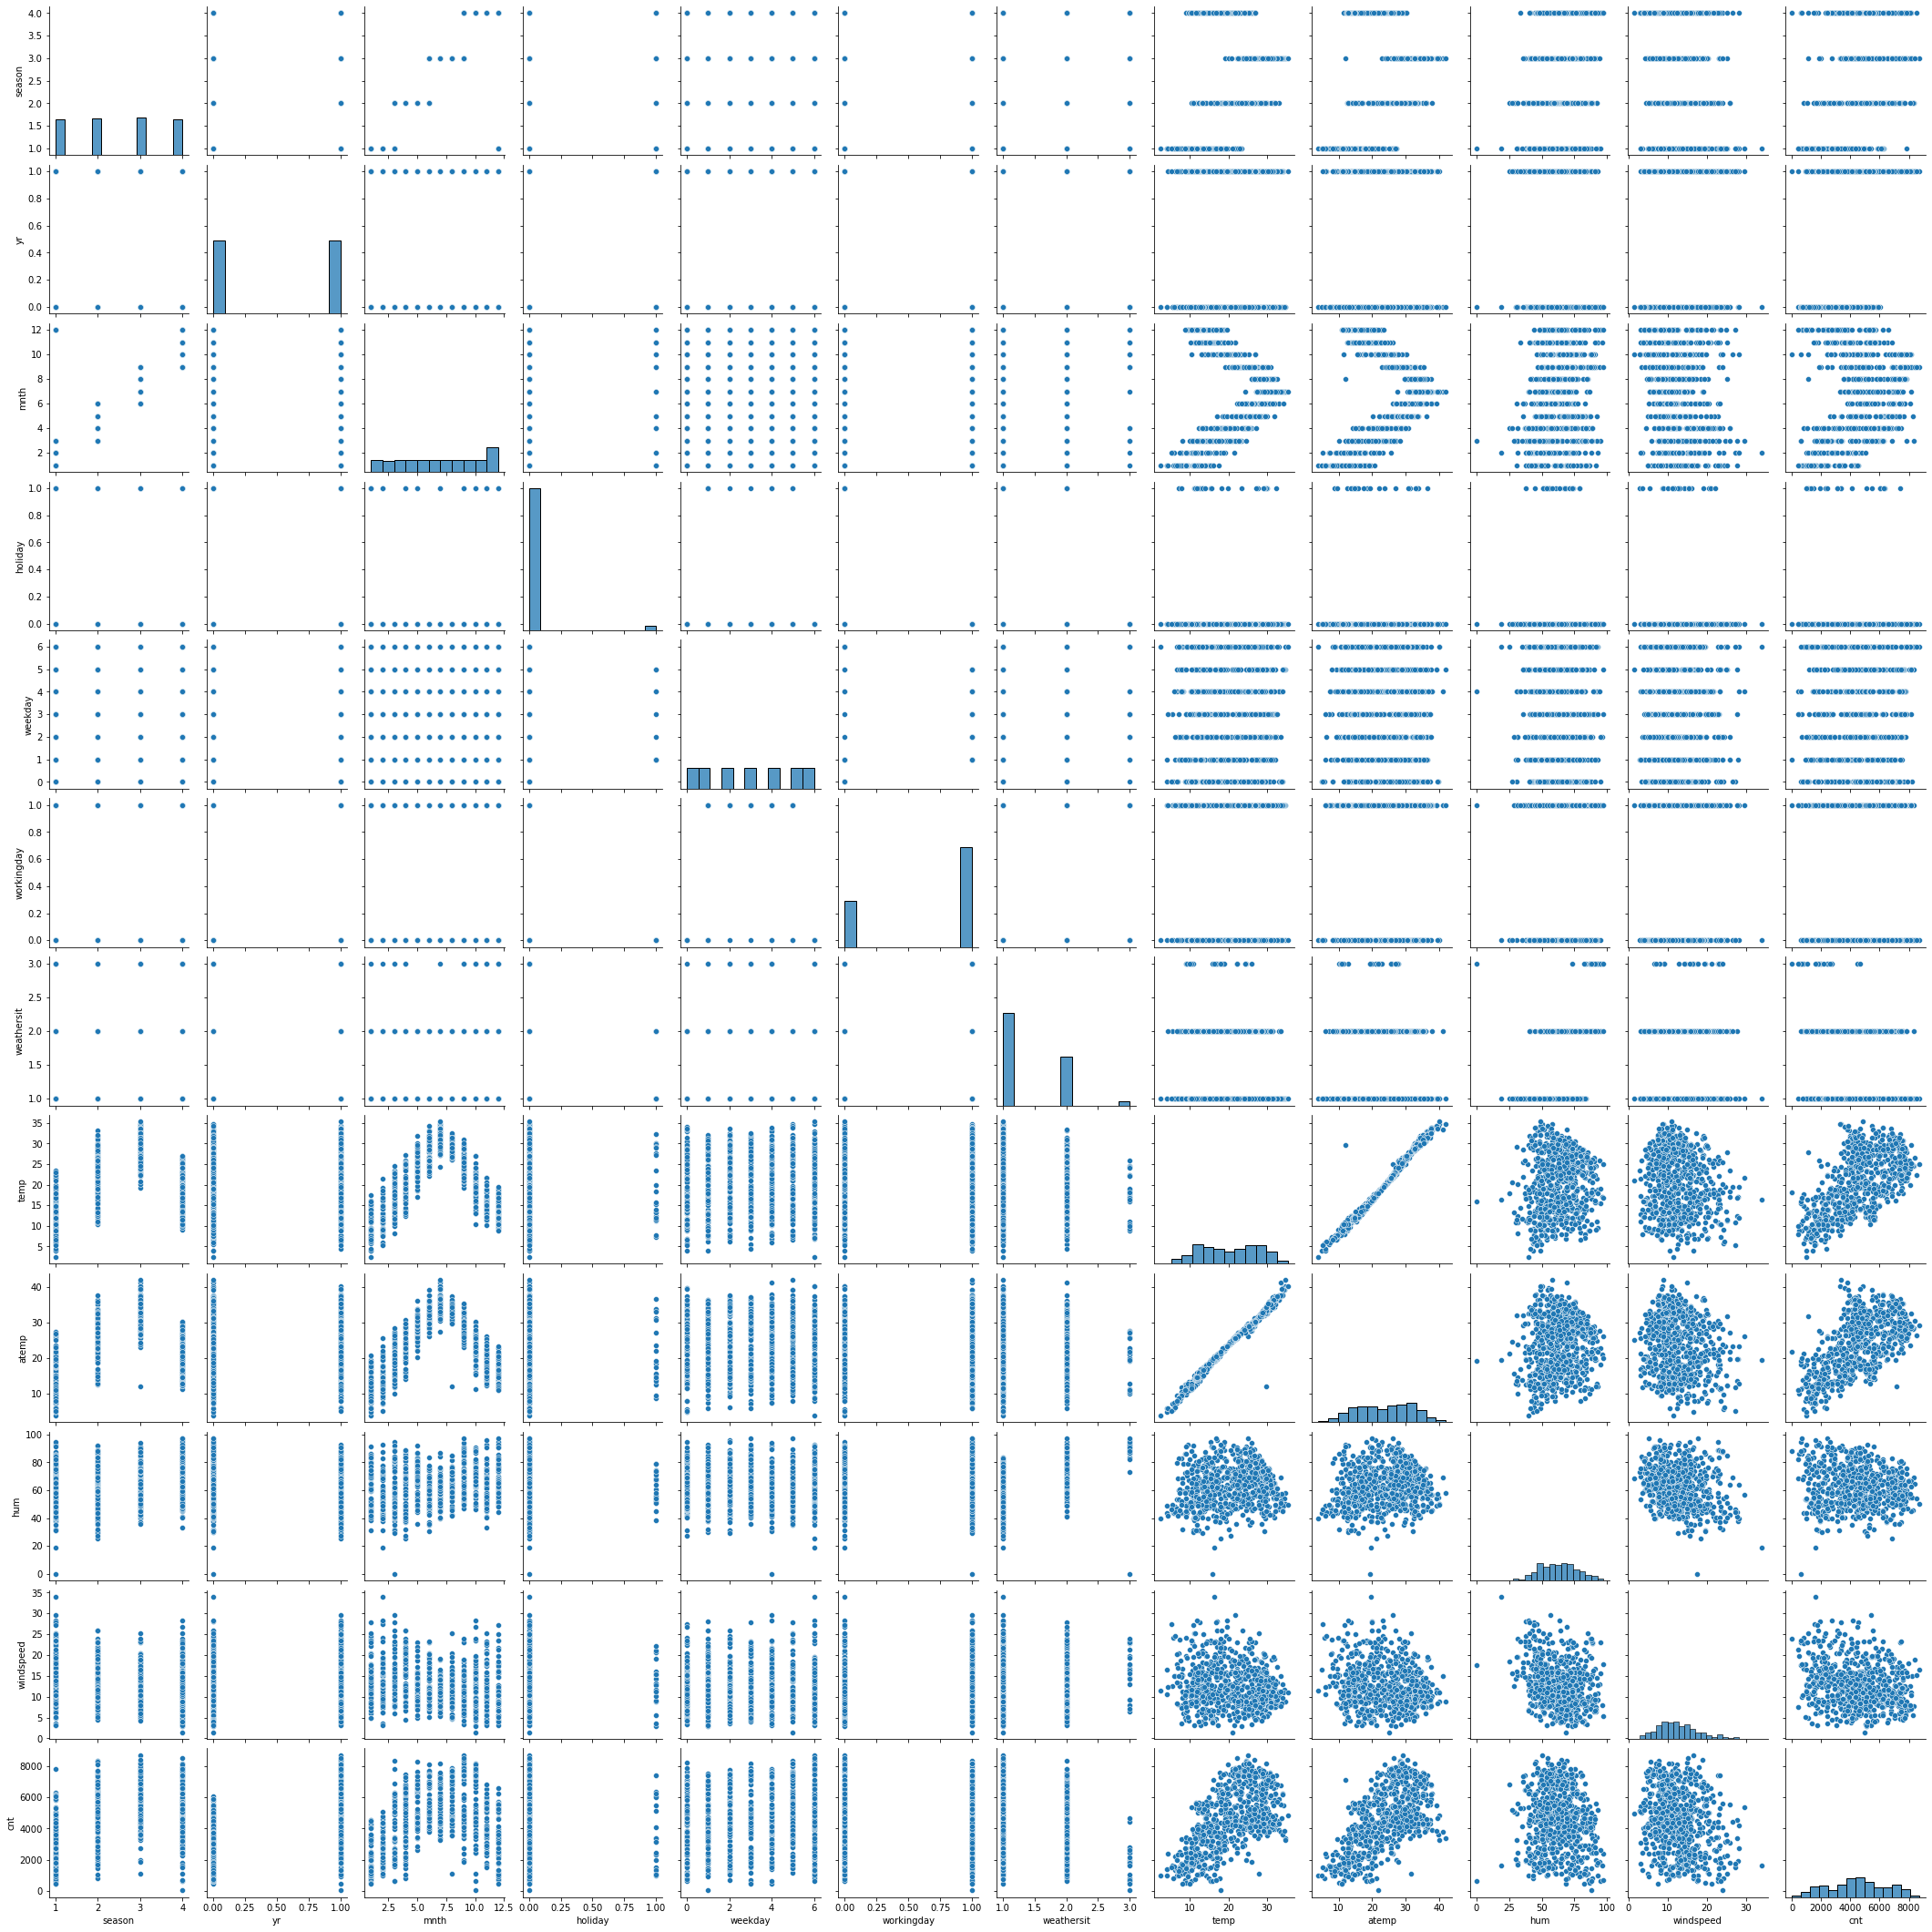

In [69]:
sns.pairplot(df)

## Variables classification

We observed that, we have some categorical variables and some continuous variables

Categorical Variables: season, yr, mnth, holiday, weekday, workingday, weathersit

Continuous Variables: atemp, hum, windspeed

### Visualising Categorical Variables

#### From the below box plots, it is clrealy visible that, for categories "season", "yr", "mnth", "holiday", "weathersit", there is significant variation in demand for different values of individual category. Hence it is worth considering these for model analysis and look for their individual co-efficients to see the impact of them on the end-model

##### For remaining two categorical variables "weekday" and "workingday", I do not see considerable variation in demand across all the categorical values. So for me it looks like, they may not identify themselves as affecting factors to our model. But I will not drop them at this moment but let our model building exercise decide the same

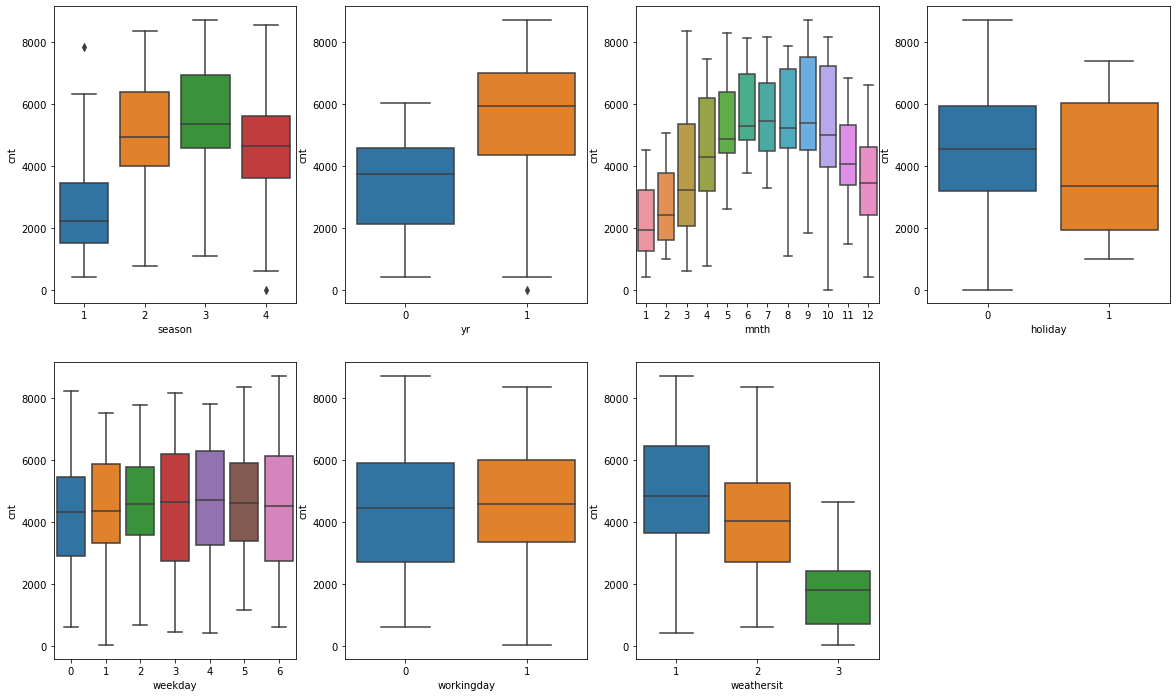

In [70]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
plot_box(df.season)
plt.subplot(2,4,2)
plot_box(df.yr)
plt.subplot(2,4,3)
plot_box(df.mnth)
plt.subplot(2,4,4)
plot_box(df.holiday)
plt.subplot(2,4,5)
plot_box(df.weekday)
plt.subplot(2,4,6)
plot_box(df.workingday)
plt.subplot(2,4,7)
plot_box(df.weathersit)


#### Below box plots are created just to check impact of holiday and workindday on weekday column. Not making any conclusion from the same at this moment but may use these later point in time to understand the model better

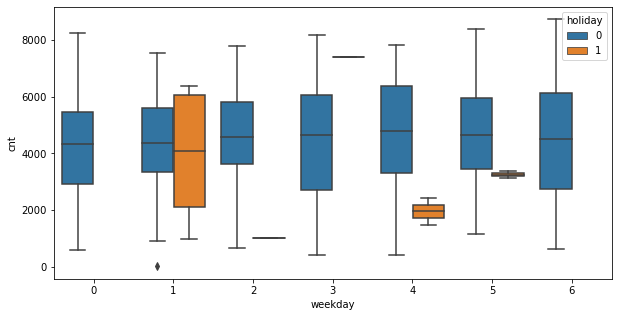

In [71]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'weekday', y = 'cnt', hue = 'holiday', data = df)
plt.show()

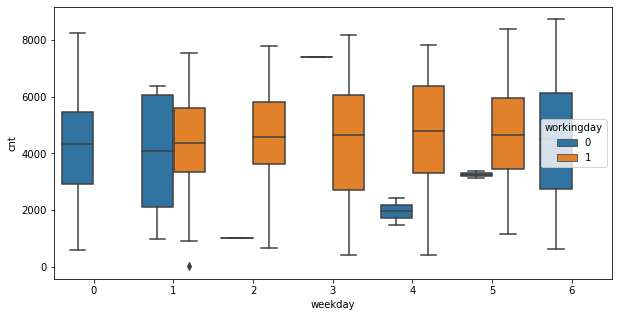

In [72]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'weekday', y = 'cnt', hue = 'workingday', data = df)
plt.show()

### Visualising Continuous Variables

#### From the below bar graps and box plots, it is clrealy visible that, continuous variables "hum" and "windspeed" show some relationship with demand. Hence it is worth considering these for model analysis and look for their individual co-efficients to see the impact of them on the end-model

#### Humidity and Demand relation

Created 10 bins of humidity level and tried to visualize the demand distribution for all humidity levels.

It can be observed here that, low humidity attracts very less demand, also humidity higher than 70 reduces the demand

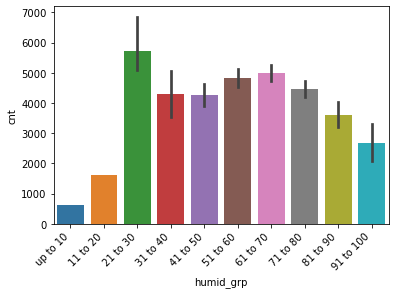

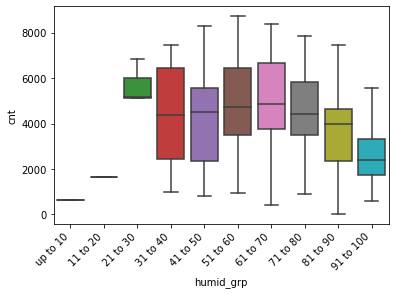

In [73]:
humid_levels = ['up to 10', '11 to 20', '21 to 30', '31 to 40', '41 to 50', '51 to 60', '61 to 70', '71 to 80', '81 to 90', '91 to 100']
cut_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
#df["income_group"] = pd.cut(loan_analyse['annual_inc'], bins=cut_bins, labels=income_levels, include_lowest=True)
df['humid_grp'] = pd.cut(df.hum, bins=cut_bins, labels=humid_levels, include_lowest=True)
plot_bar_graph(df.humid_grp)
plot_box(df.humid_grp)
plt.xticks(rotation=45,ha="right")
plt.show()

#### Windspeed and Demand relation

Created 7 bins of windspeed and tried to visualize the demand distribution across windspeed values.

It can be observed here that, lower the wind speed, higher is the demand and when speed is more than 30, demand reduces drastically

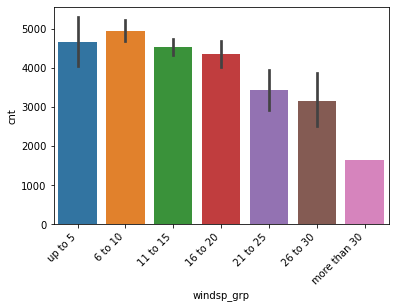

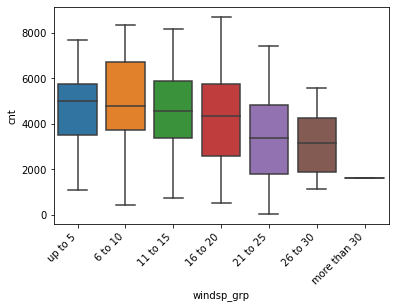

In [74]:
windsp_levels = ['up to 5', '6 to 10', '11 to 15', '16 to 20', '21 to 25', '26 to 30', 'more than 30']
cut_bins = [0, 5, 10, 15, 20, 25, 30, 35]
#df["income_group"] = pd.cut(loan_analyse['annual_inc'], bins=cut_bins, labels=income_levels, include_lowest=True)
df['windsp_grp'] = pd.cut(df.windspeed, bins=cut_bins, labels=windsp_levels, include_lowest=True)
plot_bar_graph(df.windsp_grp)
plot_box(df.windsp_grp)
plt.xticks(rotation=45,ha="right")
plt.show()

#### Finding correlation between target variable and various continuous variables

From below table it is observed that 'cnt' is positively correlated significantly with 'atemp'; however windspeed is correlated with cnt in a negative manner with low correlation value. Also 'cnt' and 'hum' are negatively correlated with very less negative value

Let us make conclusion about this relation during model building phase

In [75]:
df[['cnt', 'atemp', 'hum', 'windspeed']].corr()

,cnt,atemp,hum,windspeed
cnt,1.000000,0.630685,-0.098543,-0.235132
atemp,0.630685,1.000000,0.141512,-0.183876
hum,-0.098543,0.141512,1.000000,-0.248506
windspeed,-0.235132,-0.183876,-0.248506,1.000000


In [76]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,humid_grp,windsp_grp
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,81 to 90,11 to 15
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,61 to 70,16 to 20
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,41 to 50,16 to 20
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,51 to 60,11 to 15
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,41 to 50,11 to 15


#### For Model building, we do not need columns humid_grp and windsp_grp. We can get rid of these as we got required interpretation and understanding from these columns

In [77]:
df = df.drop(['humid_grp', 'windsp_grp'], axis=1)

In [78]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


## Data Preparation

### Labeling Data

All the categorical variables in the data set have numerical values. We need to assign appropriate string labels to these numerical values which will help us during encoding.

#### 1. season (1:spring, 2:summer, 3:fall, 4:winter)

In [79]:
def season_to_string(season_value):
    if season_value == 1:
        return 'spring'
    elif season_value == 2:
        return 'summer'
    elif season_value == 3:
        return 'fall'
    elif season_value == 4:
        return 'winter'

In [80]:
df.season = df.season.apply(lambda x: season_to_string(x))

#### 2. weathersit (1:clear, 2:mist, 3:light_rain, 4: heavy_rain)

In [81]:
def weathersit_to_string(weathersit_value):
    if weathersit_value == 1:
        return 'clear'
    elif weathersit_value == 2:
        return 'mist'
    elif weathersit_value == 3:
        return 'light_rain'
    elif weathersit_value == 4:
        return 'heavy_rain'

In [82]:
df.weathersit = df.weathersit.apply(lambda x: weathersit_to_string(x))

In [83]:
def month_to_string(month_value):
    if month_value == 1:
        return 'Jan'
    elif month_value == 2:
        return 'Feb'
    elif month_value == 3:
        return 'Mar'
    elif month_value == 4:
        return 'Apr'
    elif month_value == 5:
        return 'May'
    elif month_value == 6:
        return 'Jun'
    elif month_value == 7:
        return 'Jul'
    elif month_value == 8:
        return 'Aug'
    elif month_value == 9:
        return 'Sep'
    elif month_value == 10:
        return 'Oct'
    elif month_value == 11:
        return 'Nov'
    elif month_value == 12:
        return 'Dec'

In [84]:
df.mnth = df.mnth.apply(lambda x: month_to_string(x))

In [85]:
def weekday_to_string(weekday_value):
    if weekday_value == 0:
        return 'Sun'
    elif weekday_value == 1:
        return 'Mon'
    elif weekday_value == 2:
        return 'Tue'
    elif weekday_value == 3:
        return 'Wed'
    elif weekday_value == 4:
        return 'Thu'
    elif weekday_value == 5:
        return 'Fri'
    elif weekday_value == 6:
        return 'Sat'

In [86]:
df.weekday = df.weekday.apply(lambda x: weekday_to_string(x))

In [87]:
def year_to_string(year_value):
    if year_value == 0:
        return 'first_year'
    elif year_value == 1:
        return 'second_year'

In [88]:
df.yr = df.yr.apply(lambda x: year_to_string(x))

In [89]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,first_year,Jan,0,Sat,0,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,first_year,Jan,0,Sun,0,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,first_year,Jan,0,Mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,first_year,Jan,0,Tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,first_year,Jan,0,Wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


### One-hot encoding

Now I will apply one-hot encoding to categorical variables which I just labelled. I will in fact create dummy variables for these catagorical variables, but will not minus one variable after creating them.

In [90]:
season = pd.get_dummies(df['season'], drop_first = True)
season.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [91]:
yr = pd.get_dummies(df['yr'], drop_first = True)
yr.head()

,second_year
0,0
1,0
2,0
3,0
4,0


In [92]:
mnth = pd.get_dummies(df['mnth'], drop_first = True)
mnth.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [93]:
weekday = pd.get_dummies(df['weekday'], drop_first = True)
weekday.head()

,Mon,Sat,Sun,Thu,Tue,Wed
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [94]:
weathersit = pd.get_dummies(df['weathersit'], drop_first = True)
weathersit.head()

,light_rain,mist
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [95]:
df = pd.concat([df, season, mnth, yr, weekday,weathersit], axis = 1)

In [96]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,second_year,Mon,Sat,Sun,Thu,Tue,Wed,light_rain,mist
0,spring,first_year,Jan,0,Sat,0,mist,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,spring,first_year,Jan,0,Sun,0,mist,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,spring,first_year,Jan,0,Mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,spring,first_year,Jan,0,Tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,spring,first_year,Jan,0,Wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [97]:
df = df.drop(['season', 'mnth', 'yr', 'weekday', 'weathersit'], axis = 1)

In [98]:
df.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,second_year,Mon,Sat,Sun,Thu,Tue,Wed,light_rain,mist
0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


## Split the original dataset into training and test datasets

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [100]:
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [101]:
df_train.shape

(510, 30)

In [102]:
df_test.shape

(219, 30)

In [103]:
scaler = MinMaxScaler()

In [104]:
num_vars = ['atemp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [105]:
df_train.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,second_year,Mon,Sat,Sun,Thu,Tue,Wed,light_rain,mist
653,0,1,19.201653,0.501133,0.575354,0.300794,0.864243,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0
576,0,1,29.246653,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
426,0,0,16.980847,0.438975,0.640189,0.255342,0.465255,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1
728,0,0,10.489153,0.200348,0.498067,0.663106,0.204096,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
482,0,0,15.443347,0.391735,0.504508,0.188475,0.482973,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1


In [106]:
df_train.describe()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,second_year,Mon,Sat,Sun,Thu,Tue,Wed,light_rain,mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.025490,0.676471,20.102429,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.507843,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.157763,0.468282,7.431169,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.500429,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,2.424346,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,13.606865,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,20.209597,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,26.615847,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,35.328347,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


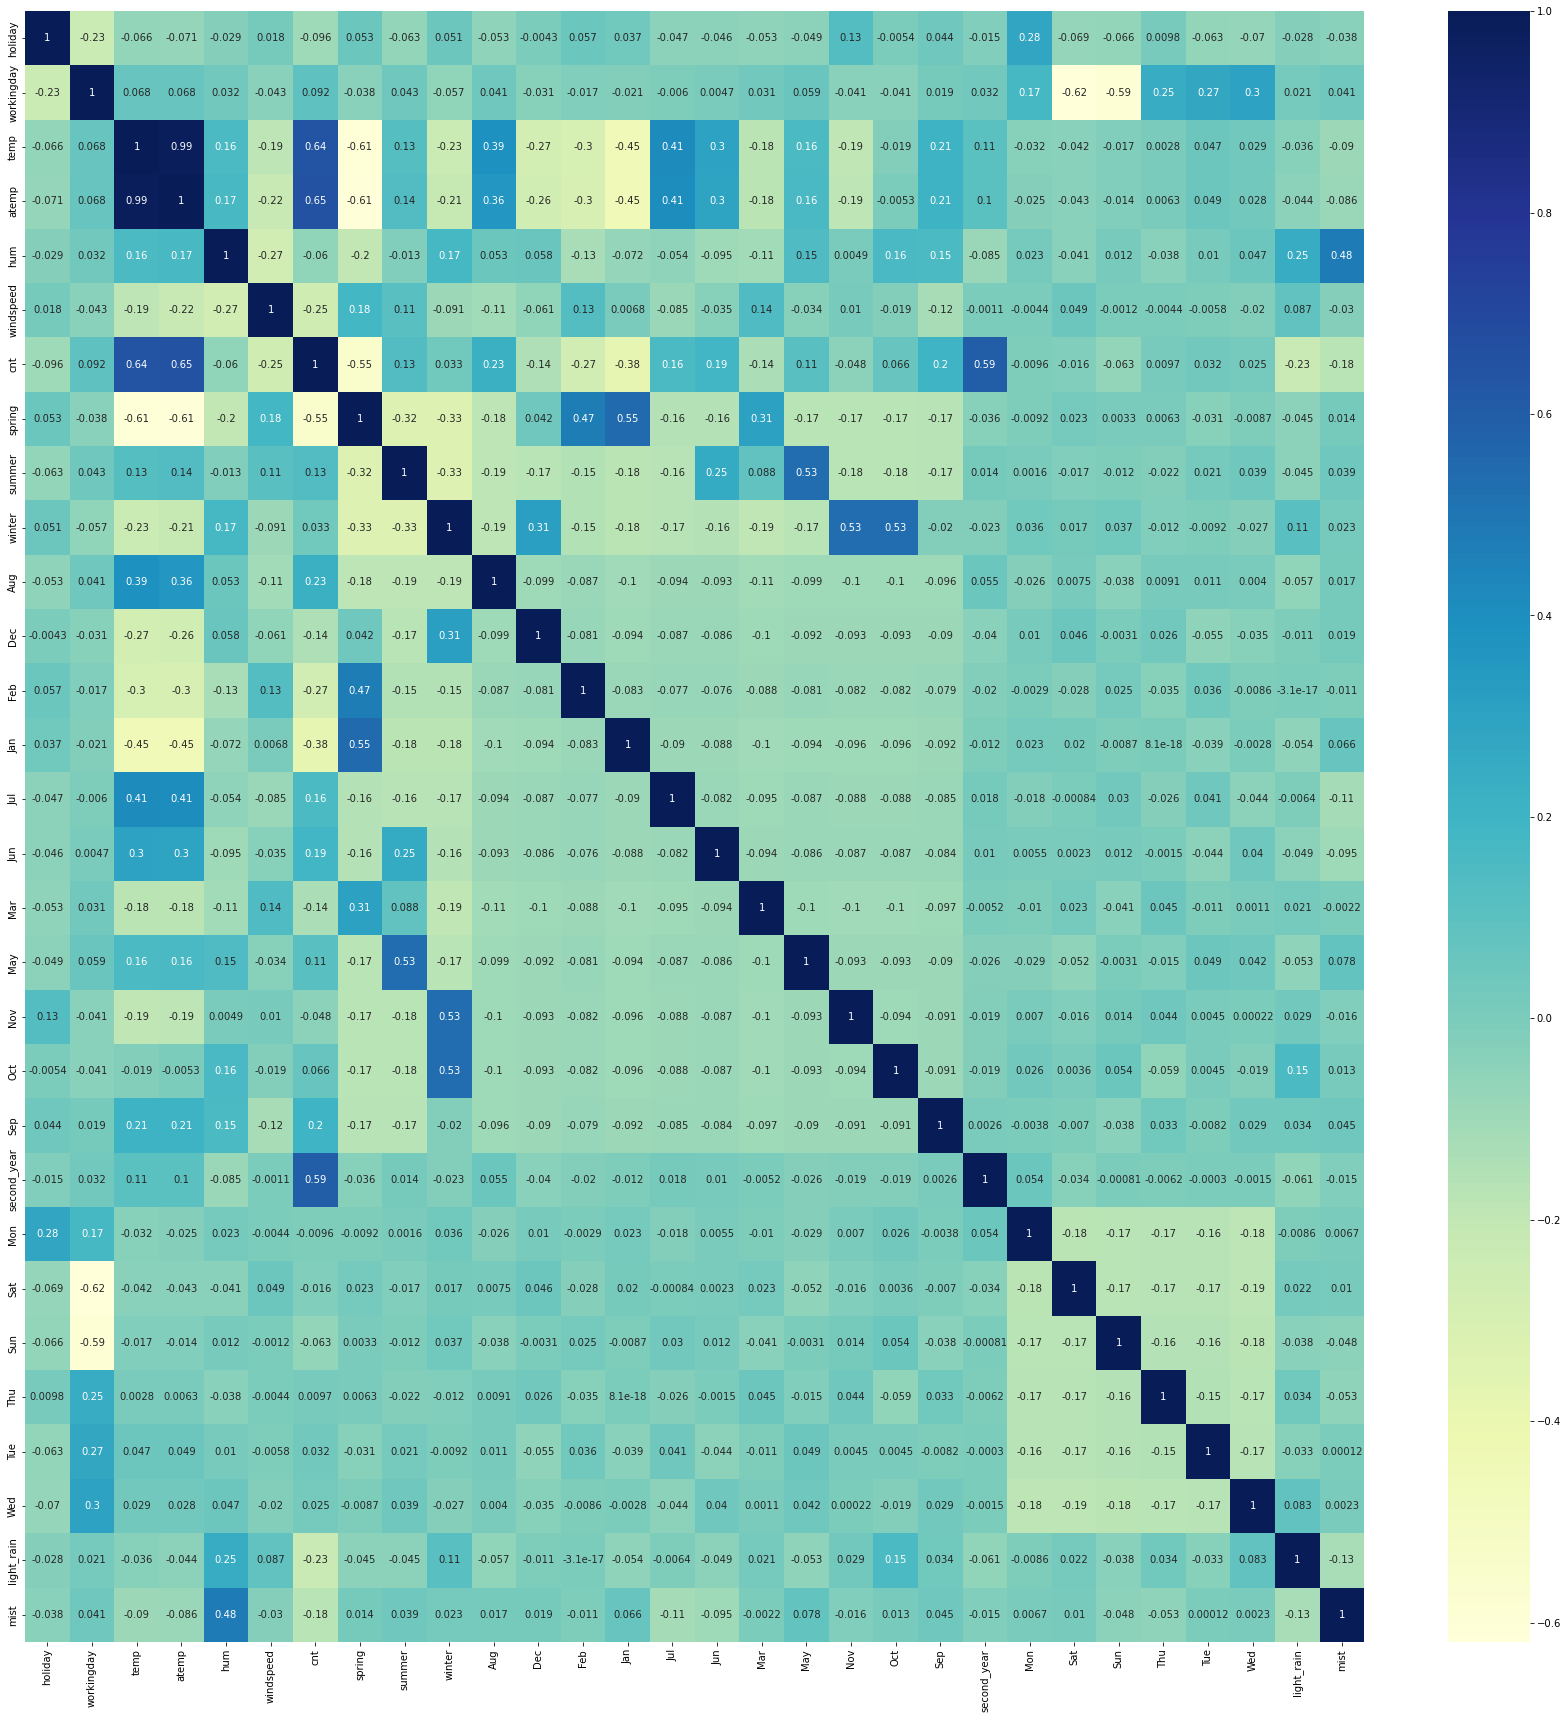

In [107]:
plt.figure(figsize = (30, 30))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### From above heatmap, primary observation says, more or less below variables show positive and negative correlation with target variable i.e. 'cnt'

Positive Correlation: clear (0.25), second_year (0.59), sep (0.2), May (0.11), Jun (0.19), Jul (0.16), Aug (0.23), summer (0.13), fall (0.37), atemp (0.67)

Negative Correlation: mist (-0.18), light_rain (-0.23), first_year (-0.59), Mar (-0.14), Jan (-0.38), Feb (-0.27), Dec (-0.14), spring (-0.55), windspeed (-0.25)

### Dividing into X and Y sets for the model building

In [109]:
y_train = df_train.pop('cnt')
X_train = df_train

KeyError: 'cnt'

### Building a linear model using RFE

In [110]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [111]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [112]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', False, 10),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 6),
 ('winter', True, 1),
 ('Aug', False, 7),
 ('Dec', True, 1),
 ('Feb', False, 3),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 14),
 ('Mar', False, 15),
 ('May', False, 4),
 ('Nov', True, 1),
 ('Oct', False, 11),
 ('Sep', True, 1),
 ('second_year', True, 1),
 ('Mon', False, 8),
 ('Sat', True, 1),
 ('Sun', False, 5),
 ('Thu', False, 12),
 ('Tue', False, 9),
 ('Wed', False, 13),
 ('light_rain', True, 1),
 ('mist', True, 1)]